 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [146]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [383]:
# Reading whale returns
whale_return_data = Path('/Users/jennyvu/FINTECH_BootCamp/Week 4/Homework/whale_returns.csv')
whale_return = pd.read_csv(whale_return_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [329]:
# Count nulls
whale_return.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [330]:
# Drop nulls
whale_return.dropna(inplace=True)
whale_return.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [331]:
whale_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [332]:
# Reading algorithmic returns
algo_returns_data = Path('/Users/jennyvu/FINTECH_BootCamp/Week 4/Homework/algo_returns.csv')
algo_returns = pd.read_csv(algo_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [333]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [334]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [335]:
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [336]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_data = Path('/Users/jennyvu/FINTECH_BootCamp/Week 4/Homework/sp_tsx_history.csv')
sp_tsx_history = pd.read_csv(sp_tsx_history_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [337]:
# Check Data Types
print( f" {sp_tsx_history['Close'][0]} {type(sp_tsx_history['Close'][1])}")

 $12,370.19 <class 'str'>


In [338]:
# Fix Data Types
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace(',', '').str.replace('$', '').astype(float)
print(sp_tsx_history)

               Close
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99
...              ...
2019-12-20  17118.44
2019-12-23  17128.71
2019-12-24  17180.15
2019-12-27  17168.21
2019-12-30  17098.56

[1818 rows x 1 columns]


/var/folders/31/9m3z39fx5ssfm42bgx72wzkm0000gn/T/ipykernel_8266/600648938.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace(',', '').str.replace('$', '').astype(float)


In [339]:
# Calculate Daily Returns
sp60_returns = sp_tsx_history.pct_change()
sp60_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [340]:
# Drop nulls
sp60_returns.dropna(inplace=True)
sp60_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [341]:
# Rename `Close` Column to be specific to this portfolio.
sp60_returns.columns = ['S&P TSX']
sp60_returns.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [441]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_return, algo_returns, sp60_returns] ,join='inner',axis=1)
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.604848
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-1.398717
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-8.420220
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,-0.342692


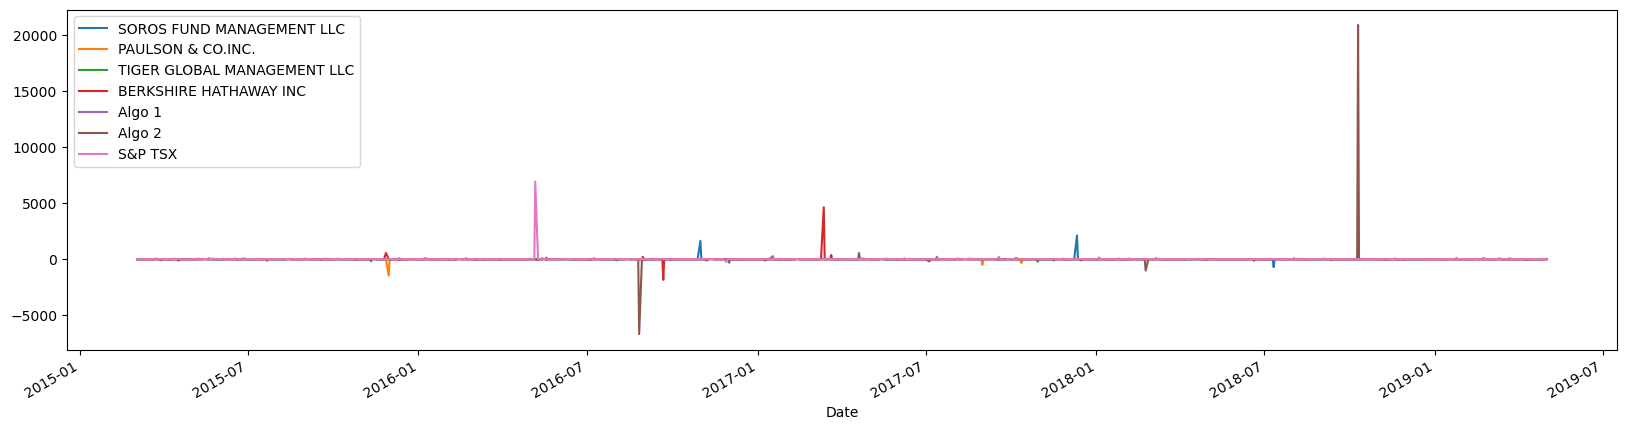

In [316]:
# Calculate and Plot daily returns of all portfolios
daily_returns = combined_returns.pct_change()
daily_returns.columns = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'S&P TSX']
daily_returns.plot(figsize=(20,5))
daily_returns.head()

In [317]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


<Axes: xlabel='Date'>

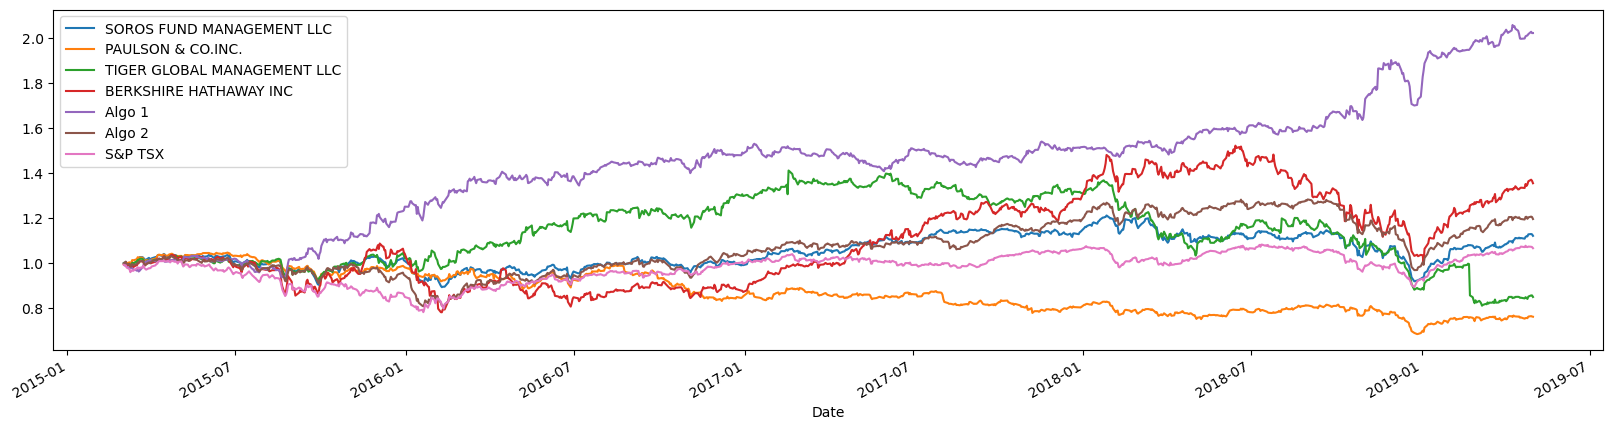

In [318]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

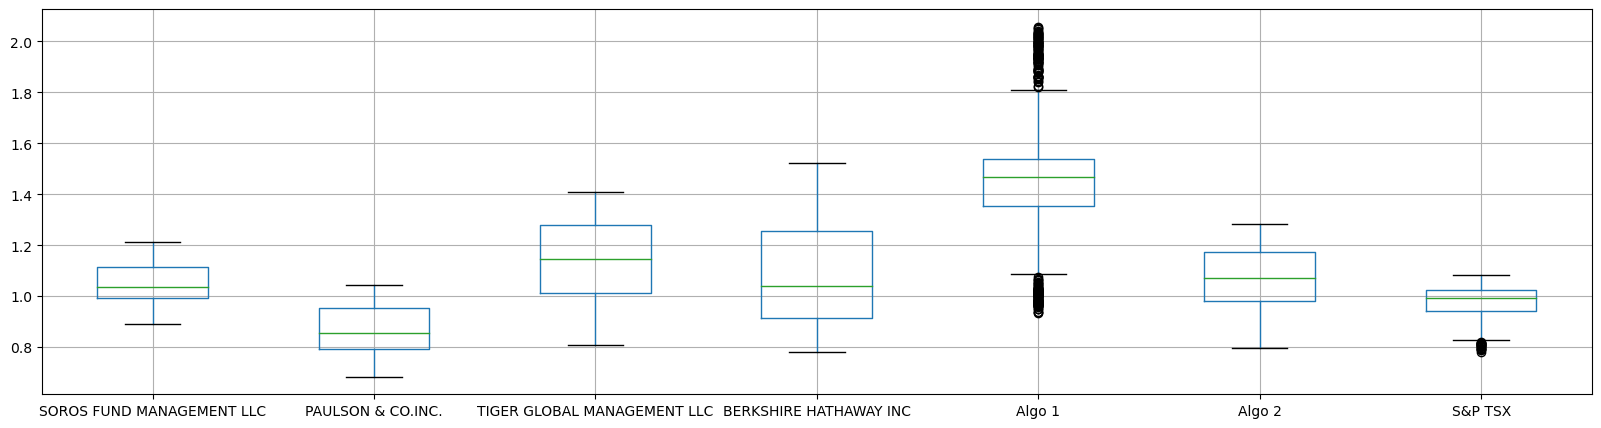

In [320]:
# Box plot to visually show risk for whale_return
cumultive_returns.columns = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'S&P TSX']
cumultive_returns.boxplot(figsize=(20,5))

### Calculate Standard Deviations

In [324]:
# Calculate the daily standard deviations of all portfolios
cumultive_returns_std = cumultive_returns.std()
cumultive_returns_std.head()

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [326]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std_SPTSX60 = sp60_returns.std()
print(daily_std_SPTSX60)

S&P TSX    0.006637
dtype: float64


In [351]:
# Determine which portfolios are riskier than the S&P TSX 60
sp60 = cumultive_returns_std['S&P TSX']
index = 0
for risk in cumultive_returns_std:
    if risk == sp60:
        print(f"{cumultive_returns_std.index[index]} Portfolio has as equal risk as S&P TSX")
    elif risk > sp60:
        print(f"{cumultive_returns_std.index[index]} Portfolio has more risk than S&P TSX")
    elif risk < sp60:
        print(f"{cumultive_returns_std.index[index]} Prtfolio has less risk than S&P TSX")
    else:
        print(f"{cumultive_returns_std.index[index]} Portfolio has no enough data to determine risk")
    index += 1

SOROS FUND MANAGEMENT LLC Portfolio has more risk than S&P TSX
PAULSON & CO.INC. Portfolio has more risk than S&P TSX
TIGER GLOBAL MANAGEMENT LLC Portfolio has more risk than S&P TSX
BERKSHIRE HATHAWAY INC Portfolio has more risk than S&P TSX
Algo 1 Portfolio has more risk than S&P TSX
Algo 2 Portfolio has more risk than S&P TSX
S&P TSX Portfolio has as equal risk as S&P TSX


### Calculate the Annualized Standard Deviation

In [353]:
# Calculate the annualized standard deviation (252 trading days)
annulized_std = cumultive_returns_std * np.sqrt(252)
annulized_std.head()

SOROS FUND MANAGEMENT LLC      1.115525
PAULSON & CO.INC.              1.440370
TIGER GLOBAL MANAGEMENT LLC    2.360896
BERKSHIRE HATHAWAY INC         3.125227
Algo 1                         4.108944
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling std for all portfolios with 21-day window'}, xlabel='Date'>

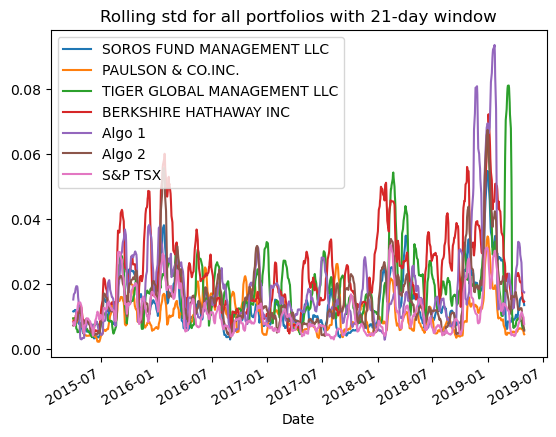

In [356]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = cumultive_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(title='Rolling std for all portfolios with 21-day window')

### Calculate and plot the correlation

<Axes: title={'center': 'Correlation of the portfolio'}>

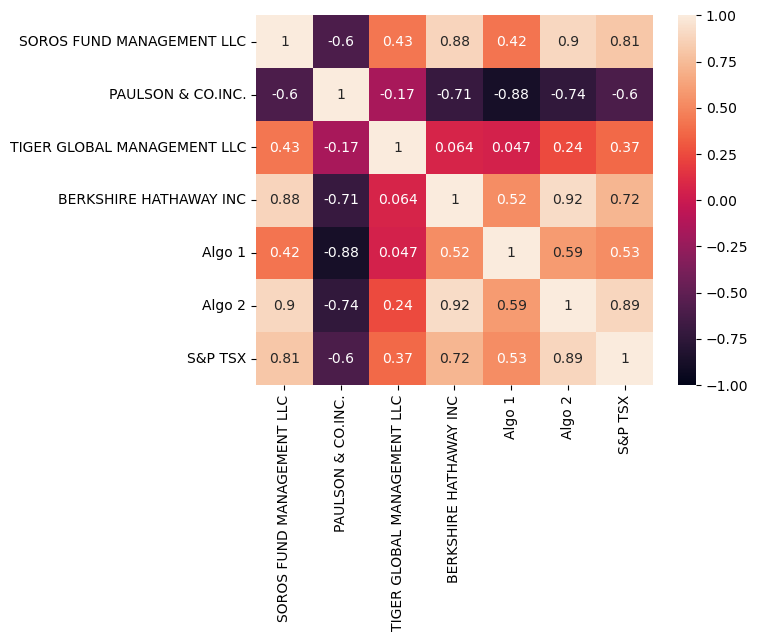

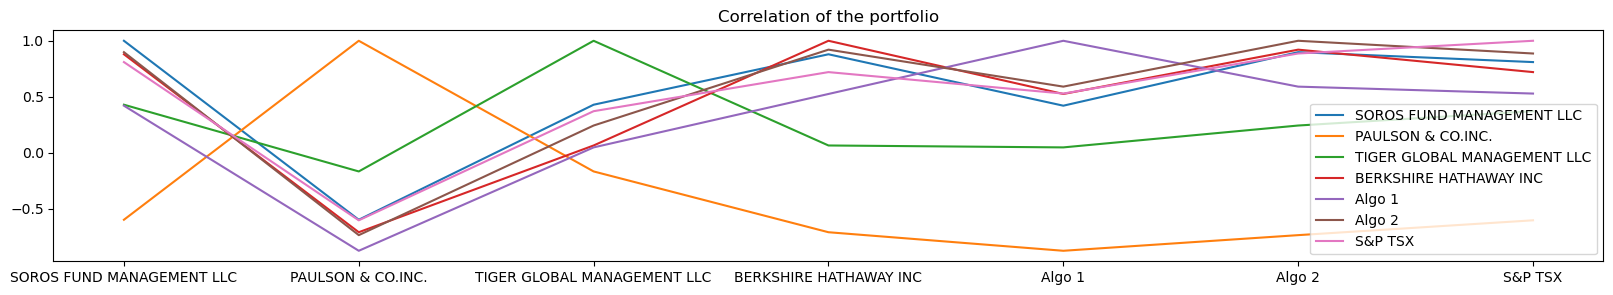

In [360]:
# Calculate the correlation
correlation_matrix = cumultive_returns.corr()

# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation_matrix,  vmin=-1, vmax=1,annot=True)
correlation_matrix.plot(figsize=(20,3), title='Correlation of the portfolio')

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<Axes: title={'center': 'Beta trend of Algo 1'}, xlabel='Date'>

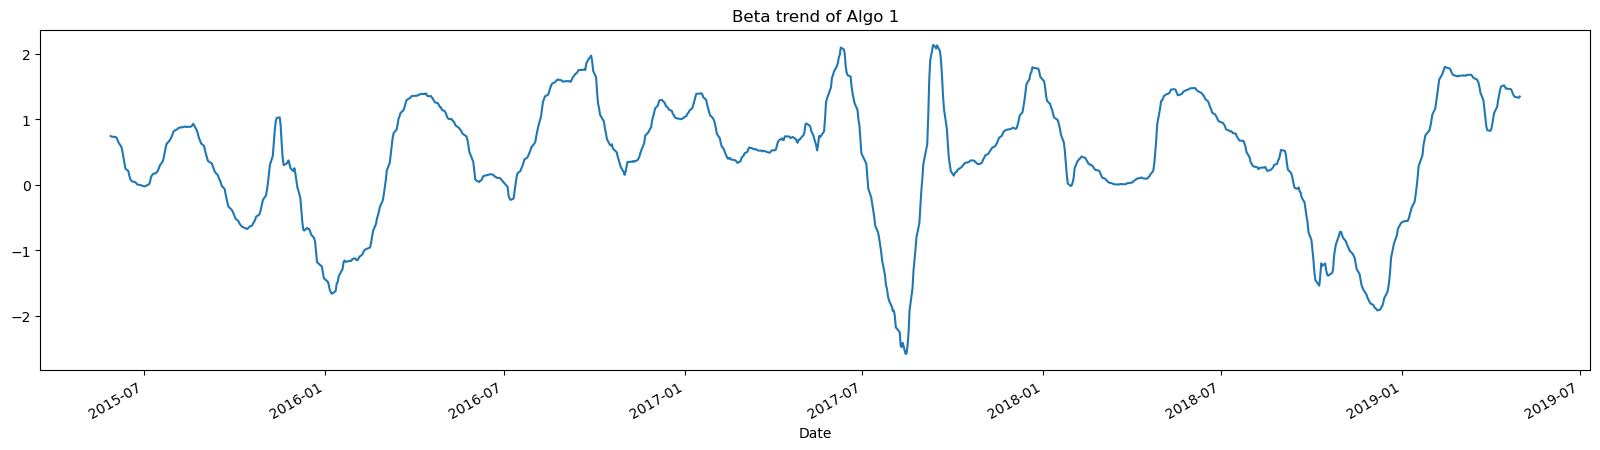

In [370]:
# Calculate covariance of a single portfolio
rolling_covariance_algo1 = cumultive_returns['Algo 1'].rolling(window=60).cov(cumultive_returns['S&P TSX'])

# Calculate variance of S&P 500
rolling_variance_sp60 = cumultive_returns['S&P TSX'].rolling(window=60).var()

# Computing beta
algo1_beta = rolling_covariance_algo1 / rolling_variance_sp60

# Plot beta trend
algo1_beta.plot(figsize=(20,5), title='Beta trend of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [371]:
# Use `ewm` to calculate the rolling window
cumultive_returns_std.ewm(halflife=21).mean()

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.080672
TIGER GLOBAL MANAGEMENT LLC    0.104108
BERKSHIRE HATHAWAY INC         0.128459
Algo 1                         0.156284
Algo 2                         0.149114
S&P TSX                        0.135774
dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [375]:
# Annualized Sharpe Ratios
sharpe_ratio = (daily_returns.mean() - daily_returns['S&P TSX'].mean())/(daily_returns.std())

<Axes: title={'center': 'Daily Sharpe Ratios'}>

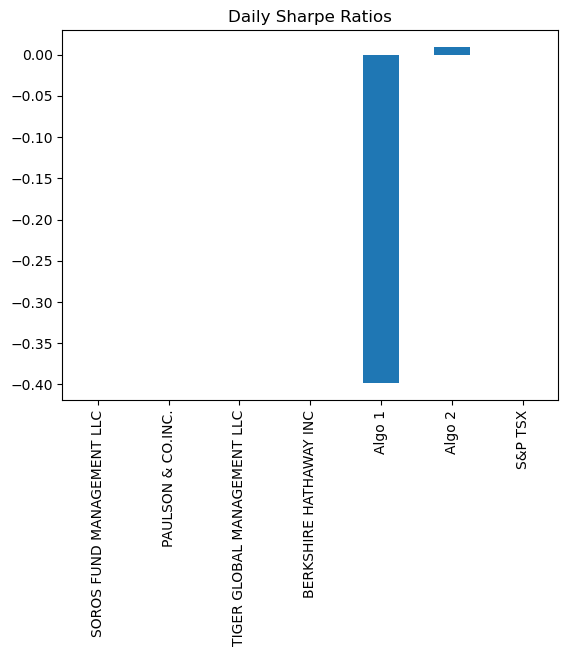

In [376]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar',  title="Daily Sharpe Ratios")

In [ ]:
#Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

In [380]:
# set variables
index=0
algo1_performance = sharpe_ratio['Algo 1']

# Determine portfolio performance in comparison to Algo 1
for performance in sharpe_ratio:
    if sharpe_ratio.index[index] == 'Algo 1':
        continue
    if performance == algo1_performance:
        print(f"Algo1 equally performed compared to {combined_returns.columns[index]} portfolio")
    elif performance < algo1_performance:
        print(f"Algo1 outperfomed {combined_returns.columns[index]} portfolio")
    elif performance > algo1_performance:
        print(f"Algo1 underperformed compared to {combined_returns.columns[index]} portfolio")
    else:
        print(f"Sorry, you are not eligible to compete with the whales.")
    index+=1

Sorry, you are not eligible to compete with the whales.
Sorry, you are not eligible to compete with the whales.
Sorry, you are not eligible to compete with the whales.
Sorry, you are not eligible to compete with the whales.


In [382]:
# set variables
index=0
algo2_performance = sharpe_ratio['Algo 2']

# Determine portfolio performance in comparison to Algo 2
for performance in sharpe_ratio:
    if sharpe_ratio.index[index] == 'Algo 2':
        continue
    if performance == algo1_performance:
        print(f"Algo2 equally performed compared to {combined_returns.columns[index]} portfolio")
    elif performance < algo1_performance:
        print(f"Algo2 outperfomed {combined_returns.columns[index]} portfolio")
    elif performance > algo1_performance:
        print(f"Algo2 underperformed compared to {combined_returns.columns[index]} portfolio")
    else:
        print(f"Sorry, you are not eligible to compete with the whales.")
    index+=1

Sorry, you are not eligible to compete with the whales.
Sorry, you are not eligible to compete with the whales.
Sorry, you are not eligible to compete with the whales.
Sorry, you are not eligible to compete with the whales.
Algo2 outperfomed Algo 1 portfolio


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [384]:
# Reading data from 1st stock
otex_stock_data = Path('/Users/jennyvu/FINTECH_BootCamp/Week 4/Homework/otex_historical.csv')
otex_stock = pd.read_csv(otex_stock_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_stock.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [385]:
# Reading data from 2nd stock
shop_stock_data = Path('/Users/jennyvu/FINTECH_BootCamp/Week 4/Homework/shop_historical.csv')
shop_stock = pd.read_csv(shop_stock_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_stock.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [394]:
# Reading data from 3rd stock
l_stock_data = Path('/Users/jennyvu/FINTECH_BootCamp/Week 4/Homework/l_historical.csv')
l_stock = pd.read_csv(l_stock_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
l_stock.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [408]:
# Combine all stocks in a single DataFrame
my_stock_portfolio = pd.concat([otex_stock.Close, shop_stock.Close, l_stock.Close], axis="columns", join="inner") 
my_stock_portfolio.head()

,Close,Close,Close
Date,,,
2018-01-02,43.58,132.06,57.99
2018-01-03,43.07,135.15,57.41
2018-01-04,42.91,137.46,57.42
2018-01-05,42.57,137.26,57.42
2018-01-08,42.16,139.51,56.86


In [409]:
# Reset Date index
my_stock_portfolio.sort_index(inplace=True)

In [412]:
# Reorganize portfolio data by having a column per symbol
my_stock_portfolio.columns = ['OTEX','SHOP','L']
my_stock_portfolio.head()

,OTEX,SHOP,L
Date,,,
2018-01-02,43.58,132.06,57.99
2018-01-03,43.07,135.15,57.41
2018-01-04,42.91,137.46,57.42
2018-01-05,42.57,137.26,57.42
2018-01-08,42.16,139.51,56.86


In [413]:
# Calculate daily returns
daily_returns = my_stock_portfolio.pct_change()

# Drop NAs
daily_returns.dropna(inplace = True)

# Display sample data
daily_returns.describe

<bound method NDFrame.describe of                 OTEX      SHOP         L
Date                                    
2018-01-03 -0.011703  0.023398 -0.010002
2018-01-04 -0.003715  0.017092  0.000174
2018-01-05 -0.007924 -0.001455  0.000000
2018-01-08 -0.009631  0.016392 -0.009753
2018-01-09 -0.000712 -0.011254  0.008969
...              ...       ...       ...
2019-12-20  0.024441 -0.005503  0.003547
2019-12-23 -0.013463 -0.003118 -0.003240
2019-12-24 -0.007773  0.026915 -0.000148
2019-12-27  0.004526  0.017834  0.001626
2019-12-30 -0.008839 -0.031734 -0.006639

[500 rows x 3 columns]>

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<Axes: title={'center': 'DAILY RETURNS for my Porfolio'}, xlabel='Date'>

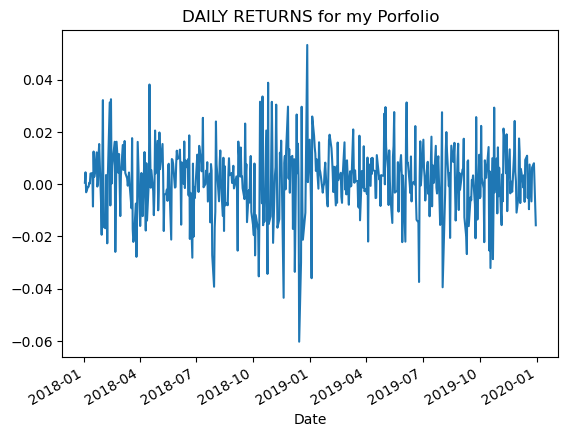

In [433]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns  = daily_returns.dot(weights)

# Display sample data
my_portfolio_returns.plot(title= 'DAILY RETURNS for my Porfolio')

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [442]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns['my portfolio'] = my_portfolio_returns
joined_portfolios = combined_returns

In [443]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_portfolios.dropna(inplace = True)
joined_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,my portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [446]:
# Calculate the annualized `std`
joined_portfolios_std = joined_portfolios.std()
annulized_std = joined_portfolios_std * np.sqrt(252)
annulized_std.head()

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Rolling 21-Day standard deviation'}, xlabel='Date'>

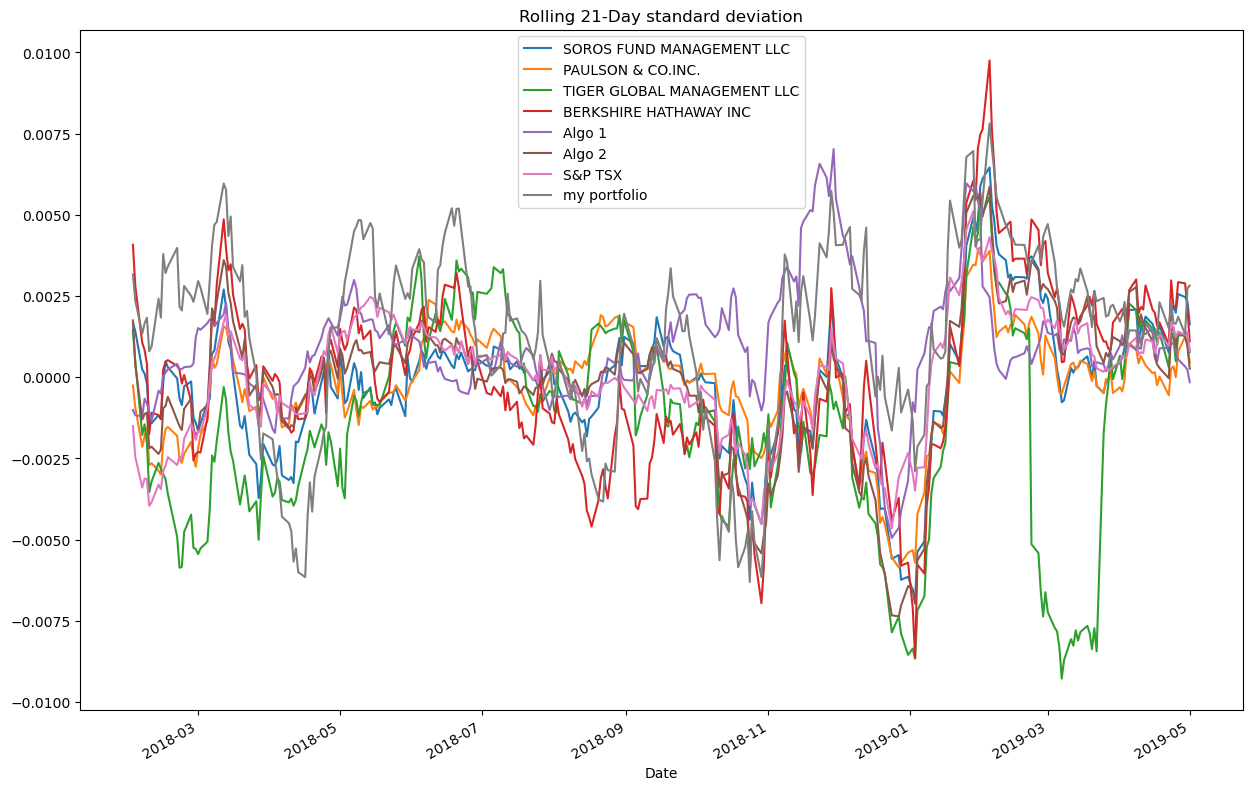

In [451]:
# Calculate rolling standard deviation
joined_portfolios_rolling_std = joined_portfolios.rolling(window=21).mean()

# Plot rolling standard deviation
joined_portfolios_rolling_std.plot(figsize=(15,10), title='Rolling 21-Day standard deviation')

### Calculate and plot the correlation

/var/folders/31/9m3z39fx5ssfm42bgx72wzkm0000gn/T/ipykernel_8266/1603439277.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation1 = joined_portfolios.corr()


<Axes: title={'center': 'Correlation 1 for Combined portfolios'}>

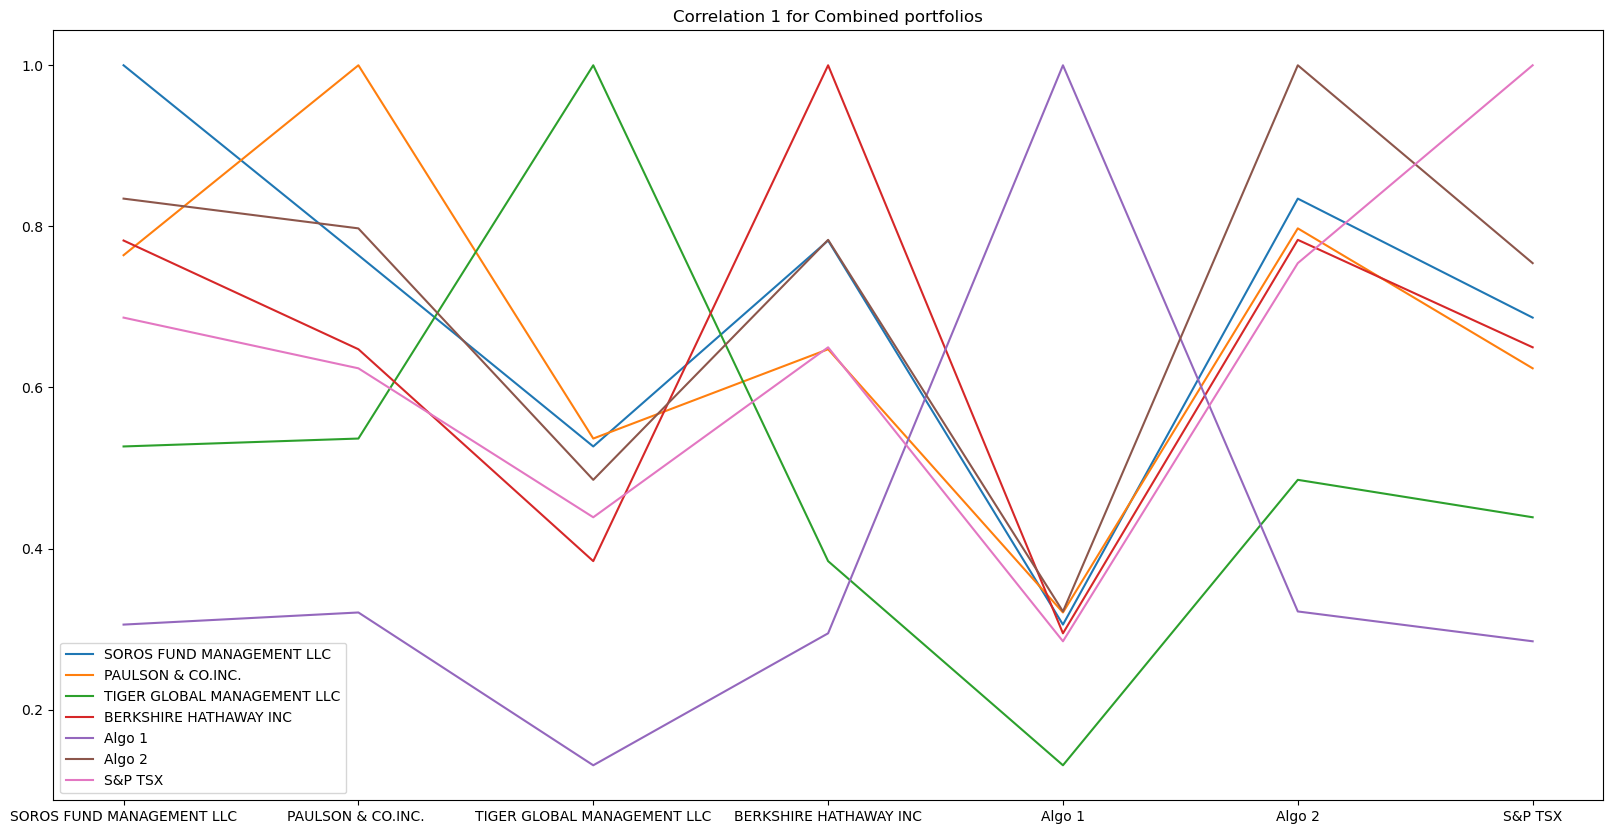

In [455]:
# Calculate and plot the correlation
correlation1 = joined_portfolios.corr()
correlation1.plot(figsize=(20,10), title ='Correlation 1 for Combined portfolios')

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<Axes: title={'center': 'Rolling Beta of my portfolio compared to S&P TSX'}, xlabel='Date'>

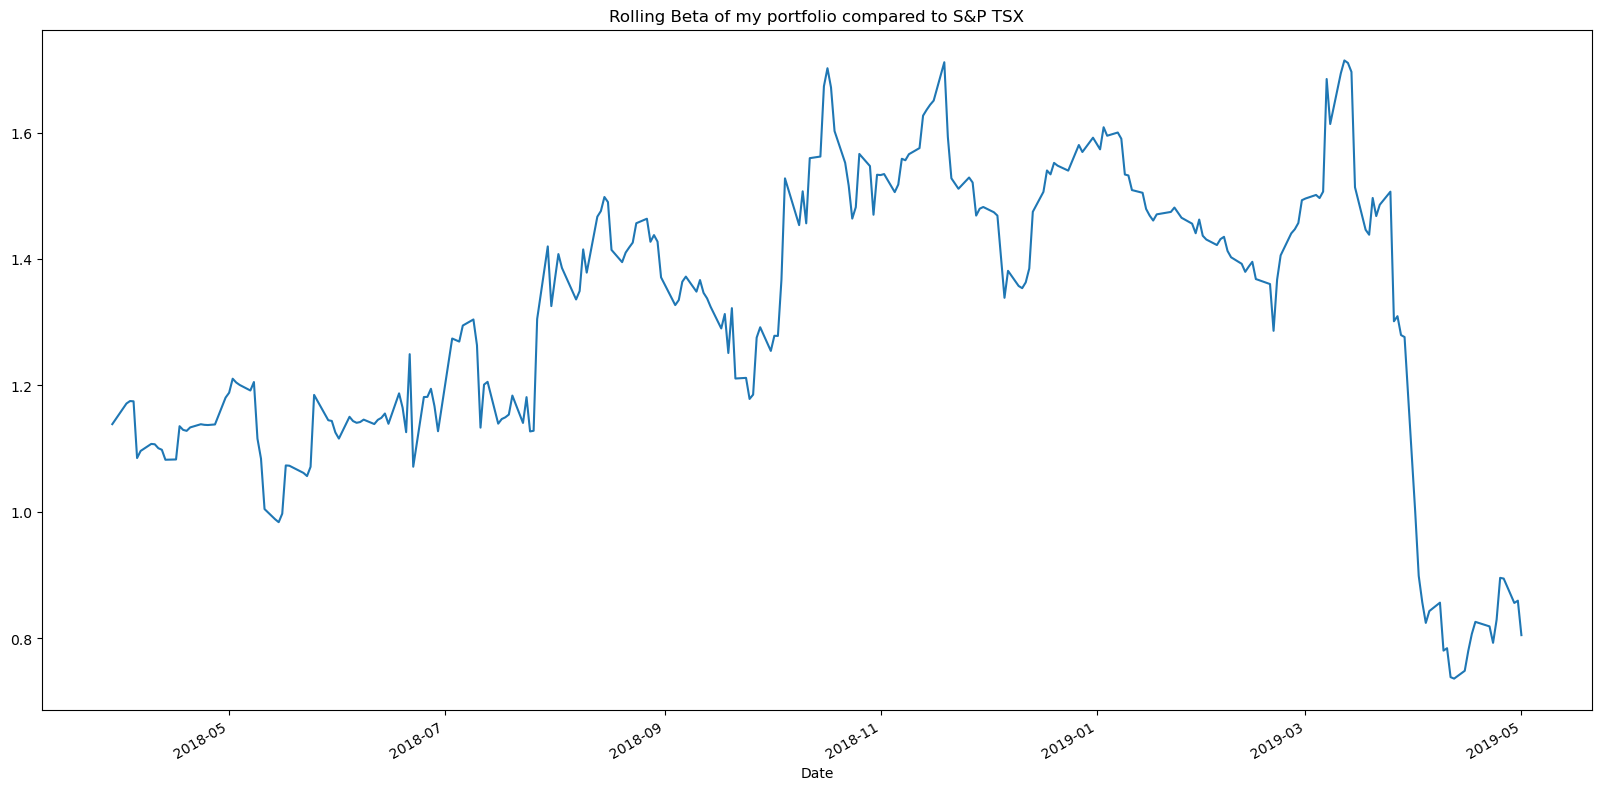

In [460]:
# Calculate and plot Beta
covariance1 = joined_portfolios['my portfolio'].rolling(window=60).cov(joined_portfolios['S&P TSX'])

variance1 = joined_portfolios['S&P TSX'].rolling(window=60).var()

joined_portfolios_rolling_beta = covariance1 / variance1

joined_portfolios_rolling_beta.plot(figsize=(20, 10), title='Rolling Beta of my portfolio compared to S&P TSX')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [461]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = ((joined_portfolios.mean()-joined_portfolios['S&P TSX'].mean()) * 252) / (joined_portfolios.std() * np.sqrt(252))

<Axes: title={'center': 'Sharpe ratio'}>

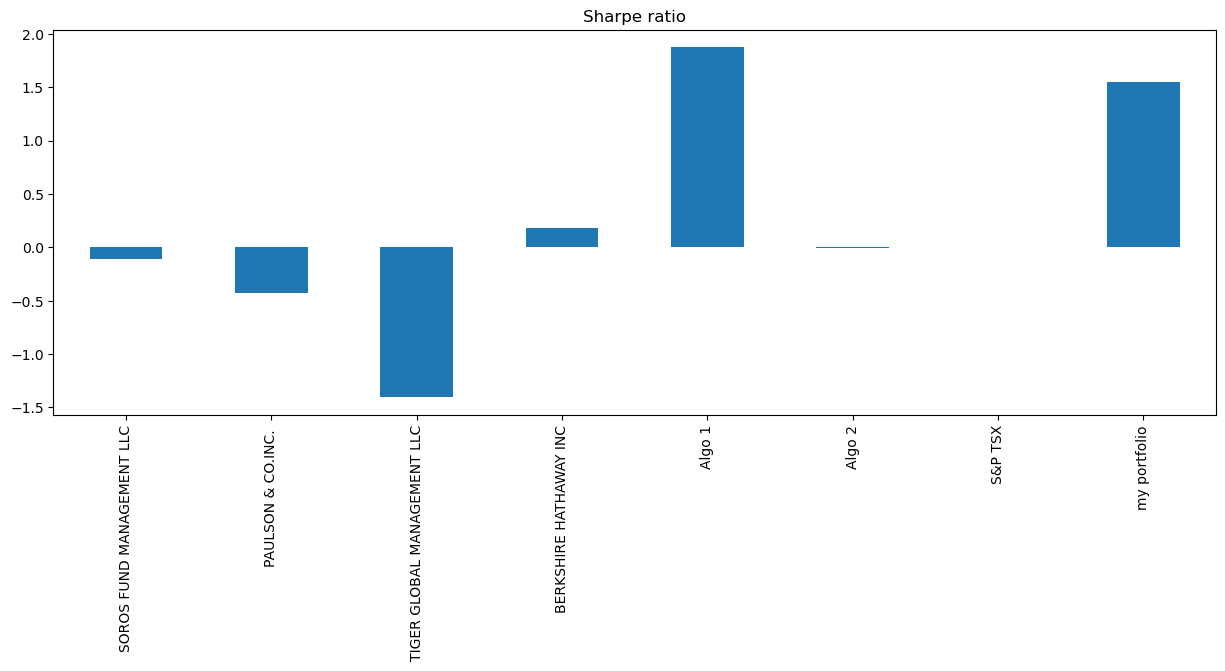

In [464]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title='Sharpe ratio',figsize=(15,5))

### How does your portfolio do?

Write your answer here!

In [468]:
# Set variables
index=0
portfolio_performance = sharpe_ratio['my portfolio']

# Determine portfolio performance in comparison to Algo 1 and 2
for performance in sharpe_ratio:
    if sharpe_ratio.index[index] == 'my portfolio':
        continue
    if performance == my_performance:
        print(f"My portfolio equally performed compared to {joined_portfolios.columns[index]} portfolio")
    elif performance < my_performance:
        print(f"My portfolio outperfomed {joined_portfolios.columns[index]} portfolio")
    elif performance > my_performance:
        print(f"My portfolio underperformed compared to {joined_portfolios.columns[index]} portfolio")
    else:
        print(f"Sorry, you are not eligible to compete.")
    index+=1

My portfolio outperfomed SOROS FUND MANAGEMENT LLC portfolio
My portfolio outperfomed PAULSON & CO.INC.  portfolio
My portfolio outperfomed TIGER GLOBAL MANAGEMENT LLC portfolio
My portfolio outperfomed BERKSHIRE HATHAWAY INC portfolio
My portfolio underperformed compared to Algo 1 portfolio
My portfolio outperfomed Algo 2 portfolio
My portfolio outperfomed S&P TSX portfolio
